In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fits = pd.read_excel('fits.xlsx')

In [3]:
#fits dataframe before adjusments
fits

,Sex,Shipment,Last 5,Coat Color,Shipping Box,Housing box,Order in box,Squad #,Box Color,Operant Box,...,Exponential-Adj. R2 (recoded),Exponential-AIC,Quadratic-k,Quadratic-R2,Quadratic-Adj. R2 (recoded),Quadratic-AIC,Linear-k,Linear-R2,Linear-Adj. R2 (recoded),Linear-AIC
0,M,2,45751,BRN HOOD,5,40,2,4,BLUE,8,...,0.725429,36.342187,0.272698,-1.349954,0.000000,50.562703,6.678471,-0.035885,0.000000,45.647864
1,F,2,45756,BLACK,11,54,2,5,BLUE,12,...,0.000000,42.756235,0.259993,-5.508170,0.000000,50.962255,6.338652,-2.516639,0.000000,47.268939
2,F,2,45757,BRN HOOD,11,18,2,2,BLUE,12,...,0.000000,42.401441,0.262557,-4.489528,0.000000,52.609082,6.564409,-2.148642,0.000000,49.273856
3,F,2,45759,BRN HOOD,10,52,2,5,BLUE,8,...,0.920194,32.324584,0.265759,0.378190,0.222737,45.981682,6.163581,0.814850,0.768562,38.712880
4,M,2,45760,BROWN,5,39,2,4,BLUE,6,...,0.879992,35.471797,0.247963,0.533578,0.416973,44.955831,5.690875,0.833890,0.792363,38.761188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,M,4,47963,BLK HOOD,1,12,2,1,RED,8,...,0.378722,39.455651,0.438252,0.506212,0.341616,39.745699,6.498826,0.554768,0.406358,39.228146
391,F,4,47964,BLK HOOD,6,34,1,3,RED,3,...,0.292852,44.912651,0.225828,0.333280,0.166600,45.898297,4.924056,0.460635,0.325794,44.626432
392,M,4,47968,BRN HOOD,1,27,1,3,BLUE,5,...,0.718459,40.902493,0.213945,0.611274,0.514093,44.176931,4.788950,0.761658,0.702073,41.241926
393,M,4,47973,BLACK,1,12,1,1,RED,7,...,0.897968,32.911002,0.222286,0.833993,0.792491,37.170351,4.822055,0.948307,0.935384,30.170114


In [4]:
#Rename Columns
fits.rename(columns={'Sex': 'sex', 'Shipment': 'cohort','Last 5': 'rfid', 'Coat Color': 'coat_color'
                     ,'Shipping Box': 'shipping_box', 'Housing box': 'housing_box',
                     'Order in box': 'order_in_box', 'Squad #': 'squad_num',
                    'Box Color': 'box_color', 'Operant Box': 'opertant_box','ID-Check': 'id_check',
                     'Subject#': 'subject_num','s or ns': 's_or_ns', 'Missing Indifference Point': 'missing_indiff_point',
                     'Missing Indiff-Count': 'missing_indiff_count', 'Indiff0': 'indiff_0','Indiff2': 'indiff_2',
                     'Indiff4': 'indiff_4','Indiff8': 'indiff_8', 'Indiff16': 'indiff_16','Indiff24': 'indiff_24',
                     'Hyperbolic-k': 'hyperbolic_k', 'Hyperbolic-ln(k)': 'hyperbolic_lnk',
                    'Hyperbolic-b': 'hyperbolic_b','Hyperbolic-R2': 'hyperbolic_R2',
                    'Hyperbolic-Adj. R2 (recoded)': 'hyperbolic_adj_R2','Hyperbolic-AIC': 'hyperbolic_AIC',
                     'AUC-traditional': 'AUC_traditional','AUC-normal0s': 'AUC_normal',
                     'Hyperboloid-k': 'hyperboloid_k','Hyperboloid-s': 'hyperboloid_s','Hyperboloid-R2': 'hyperboloid_R2',
                     'Hyperboloid-Adj. R2 (recoded)': 'hyperboloid_adj_R2','Hyperboloid-AIC': 'hyperboloid_AIC',
                    'Quasi-H-k [beta]': 'quasi_H_k_beta', 'Quasi-H-s [delta]': 'quasi_H_s_delta',
                     'Quasi-H-R2': 'quasi_H_R2', 'Quasi-H-Adj. R2 (recoded)': 'quasi_H_adj_R2',
                    'Quasi-H-AIC': 'quasi_H_AIC', 'Exponential-k': 'expon_k','Exponential-R2': 'expon_R2',
                     'Exponential-Adj. R2 (recoded)': 'expon_adj_R2','Exponential-AIC': 'expon_AIC','Quadratic-k': 'quad_k',
                    'Quadratic-R2': 'quad_R2','Quadratic-Adj. R2 (recoded)': 'quad_adj_R2','Quadratic-AIC': 'quad_AIC',
                    'Linear-k': 'linear_k','Linear-R2': 'linear_R2','Linear-Adj. R2 (recoded)': 'linear_adj_R2','Linear-AIC': 'linear_AIC',}, inplace=True)

In [5]:
#Make colors uniform
before_colors = fits.coat_color.unique()
#Black Hood
fits.replace(to_replace =["BLK HOOD", "BLACK HOOD","BLK HHOD"], 
                            value ="black_hood",inplace = True)
#Brown Hood
fits.replace(to_replace =["BRN HOOD", "BROWN HOOD"], 
                            value ="brown_hood",inplace = True)
#Black
fits.replace(to_replace =["BLACK"], 
                            value ="black",inplace = True)
#Brown
fits.replace(to_replace =["BROWN", "BROWN "], 
                            value ="brown",inplace = True)
#Albino
fits.replace(to_replace =["ALBINO"], 
                            value ="albino",inplace = True)
after_colors = fits.coat_color.unique()
print("Before Colors: ",before_colors)
print("After Colors: ",after_colors)


Before Colors:  ['BRN HOOD' 'BLACK' 'BROWN' 'BLK HOOD' 'ALBINO' 'BROWN HOOD' 'BLACK HOOD'
 'BROWN ' 'BLK HHOD']
After Colors:  ['brown_hood' 'black' 'brown' 'black_hood' 'albino']


In [6]:
#Change sex and box_color columns to lower case
fits['sex'] = fits['sex'].str.lower()
fits['box_color'] = fits['box_color'].str.lower()
#fits.box_color.unique()

In [7]:
#Change the last 5 numbers of RFID to include entire number
#cohort_list_1 = ['C01','C02','C03','C04']
#cohort_list_2 = ['C05','C06','C07']
#for i in cohort_list_1:
    #fits.loc[(fits.cohort == i),'rfid'] = '9330003200' + fits['rfid'].astype(str)
fits['last_5'] = fits['rfid'].astype(str)
fits['rfid'] = '9330003200' + fits['rfid'].astype(str)
#for i in cohort_list_2:
    #fits.loc[(fits.cohort == i),'rfid'] = '9330003201' + fits['rfid'].astype(str)

In [8]:
#Change shipment values to be in the C0 cohort format
fits['cohort'] = 'C0' + fits['cohort'].astype(str)

In [9]:
list(fits.columns.values)

['sex',
 'cohort',
 'rfid',
 'coat_color',
 'shipping_box',
 'housing_box',
 'order_in_box',
 'squad_num',
 'box_color',
 'opertant_box',
 'id_check',
 'subject_num',
 's_or_ns',
 'missing_indiff_point',
 'missing_indiff_count',
 'indiff_0',
 'indiff_2',
 'indiff_4',
 'indiff_8',
 'indiff_16',
 'indiff_24',
 'hyperbolic_k',
 'hyperbolic_lnk',
 'hyperbolic_b',
 'hyperbolic_R2',
 'hyperbolic_adj_R2',
 'hyperbolic_AIC',
 'AUC_traditional',
 'AUC_normal',
 'hyperboloid_k',
 'hyperboloid_s',
 'hyperboloid_R2',
 'hyperboloid_adj_R2',
 'hyperboloid_AIC',
 'quasi_H_k_beta',
 'quasi_H_s_delta',
 'quasi_H_R2',
 'quasi_H_adj_R2',
 'quasi_H_AIC',
 'expon_k',
 'expon_R2',
 'expon_adj_R2',
 'expon_AIC',
 'quad_k',
 'quad_R2',
 'quad_adj_R2',
 'quad_AIC',
 'linear_k',
 'linear_R2',
 'linear_adj_R2',
 'linear_AIC',
 'last_5']

In [18]:
def drop(fits):
    fits = fits.drop(['missing_indiff_point',
 'missing_indiff_count',
 'hyperbolic_R2',
 'hyperbolic_adj_R2',
 'hyperbolic_AIC',
 'hyperboloid_k',
 'hyperboloid_s',
 'hyperboloid_R2',
 'hyperboloid_adj_R2',
 'hyperboloid_AIC',
 'quasi_H_R2',
 'quasi_H_adj_R2',
 'quasi_H_AIC',
 'expon_k',
 'expon_R2',
 'expon_adj_R2',
 'expon_AIC',
 'quad_k',
 'quad_R2',
 'quad_adj_R2',
 'quad_AIC',
 'linear_k',
 'linear_R2',
 'linear_adj_R2',
 'linear_AIC',
 'last_5'], axis=1)
    return fits

fits = drop(fits)

In [70]:
#Fits dataframe with adjustments
list(fits.columns.values)

['sex',
 'cohort',
 'rfid',
 'coat_color',
 'shipping_box',
 'housing_box',
 'order_in_box',
 'squad_num',
 'box_color',
 'opertant_box',
 'id_check',
 'subject_num',
 's_or_ns',
 'indiff_0',
 'indiff_2',
 'indiff_4',
 'indiff_8',
 'indiff_16',
 'indiff_24',
 'hyperbolic_k',
 'hyperbolic_lnk',
 'hyperbolic_b',
 'AUC_traditional',
 'AUC_normal',
 'quasi_H_k_beta',
 'quasi_H_s_delta']

In [62]:
fits = fits.replace('A', np.NaN, regex=True)
fits = fits.replace('NaN', np.NaN, regex=True)
fits['indiff_2'].value_counts()
df = fits[fits['indiff_24'].notnull()]
#df = fits.loc[fits['indiff_24'].isnull() == False] 
#df = fits[fits.indiff_24 != 'NaN']
df

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,indiff_8,indiff_16,indiff_24,hyperbolic_k,hyperbolic_lnk,hyperbolic_b,AUC_traditional,AUC_normal,quasi_H_k_beta,quasi_H_s_delta
0,m,C02,933000320045751,brown_hood,5,40,2,4,blue,8,...,49.205815,22.286333,30.258215,0.152786,-1.878717,0.794732,0.319148,0.401579,0.815571,0.905189
1,f,C02,933000320045756,black,11,54,2,5,blue,12,...,62.431850,37.152422,31.230381,0.083817,-2.479118,0.640505,0.353315,0.551620,0.595001,0.952806
2,f,C02,933000320045757,brown_hood,11,18,2,2,blue,12,...,43.284175,42.058929,29.908862,0.249252,-1.389293,0.796148,0.312850,0.392955,0.409958,0.971604
3,f,C02,933000320045759,brown_hood,10,52,2,5,blue,8,...,69.614073,31.810227,26.974896,0.151994,-1.883917,1.068606,0.431175,0.403493,0.987392,0.921055
4,m,C02,933000320045760,brown,5,39,2,4,blue,6,...,90.602227,45.685779,31.550220,0.172621,-1.756656,1.229121,0.498878,0.405882,1.008066,0.931037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,f,C04,933000320047962,black_hood,6,38,2,4,blue,4,...,73.177982,33.102348,24.119408,0.104755,-2.256132,1.095147,0.500704,0.457203,1.402318,0.901520
391,f,C04,933000320047964,black_hood,6,34,1,3,red,3,...,84.682184,66.694060,36.386721,0.007513,-4.891068,0.523546,0.576590,1.101316,1.291869,0.928345
392,m,C04,933000320047968,brown_hood,1,27,1,3,blue,5,...,116.862215,58.987025,46.116756,0.155155,-1.863329,1.378207,0.606703,0.440212,1.037585,0.948342
393,m,C04,933000320047973,black,1,12,1,1,red,7,...,113.984993,64.902099,37.109793,0.087389,-2.437385,1.134337,0.616921,0.543860,1.102845,0.945492


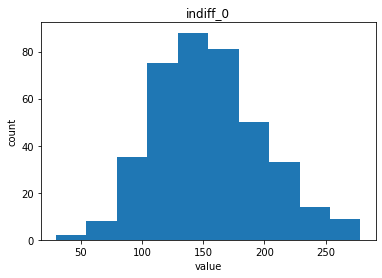

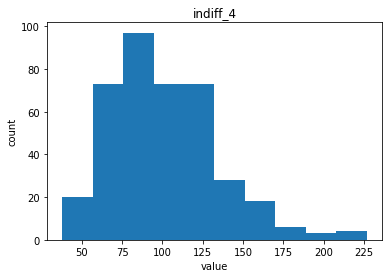

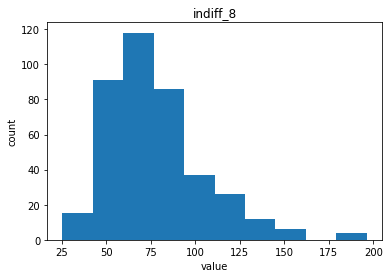

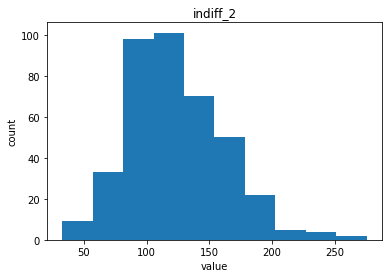

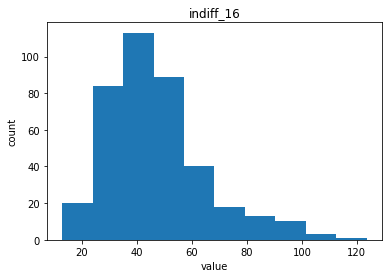

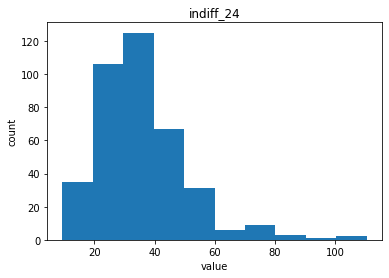

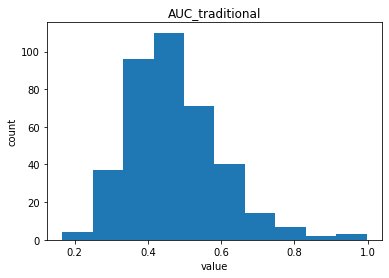

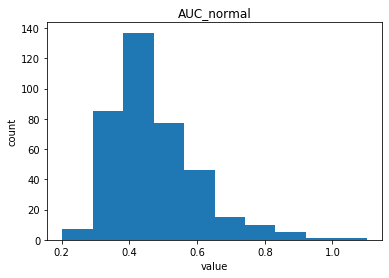

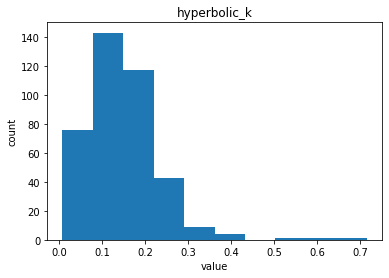

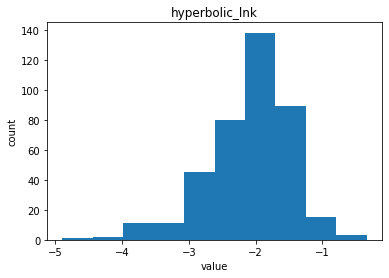

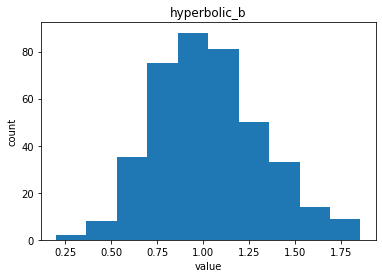

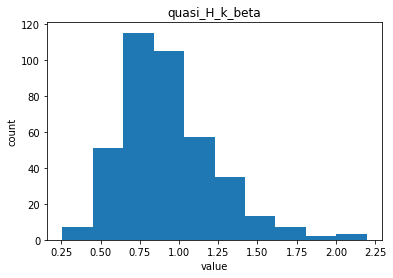

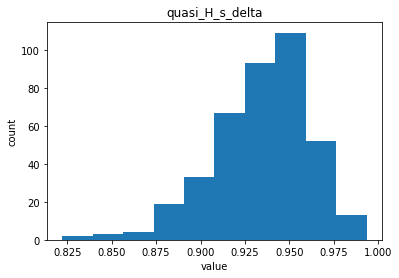

In [65]:
graph_columns = ['indiff_0','indiff_4',
                 'indiff_8','indiff_2','indiff_16','indiff_24','AUC_traditional','AUC_normal',
                 'hyperbolic_k','hyperbolic_lnk','hyperbolic_b',
                 'quasi_H_k_beta','quasi_H_s_delta']
#removed following object_columns for graphing
#object_columns = ['indiff_2','indiff_16','indiff_24','AUC_traditional','AUC_normal']
#for col in object_columns:
#    fits[col] = pd.to_numeric(fits[col], downcast="float")
for col in graph_columns:
    #df = fits[fits[col].notna()]
    df = fits[fits[col].notnull()]
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.hist(df[col])
    plt.show() 



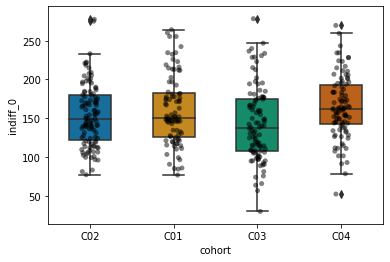

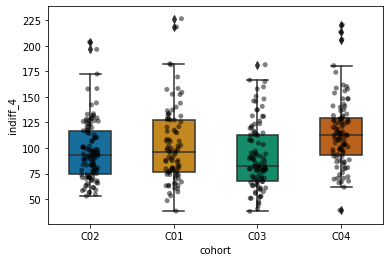

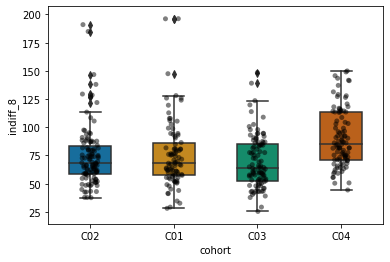

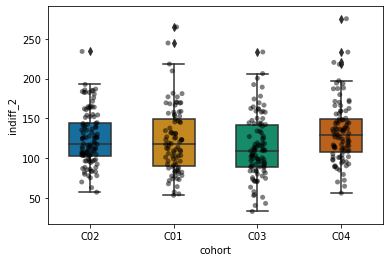

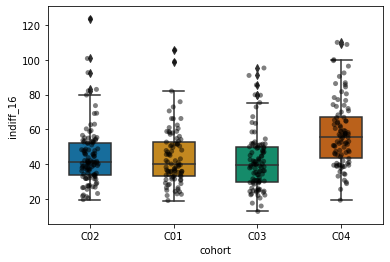

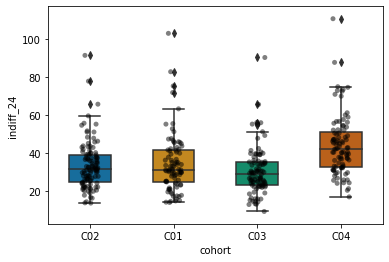

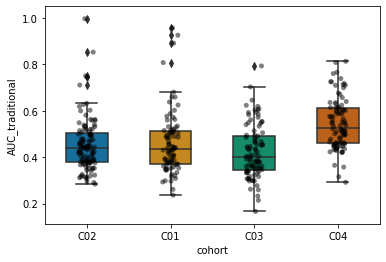

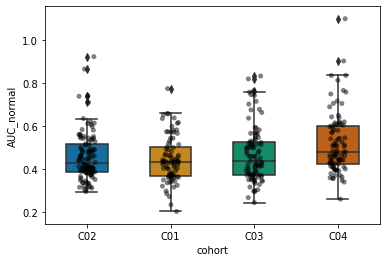

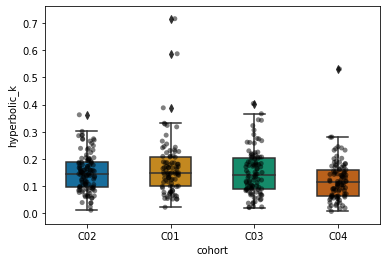

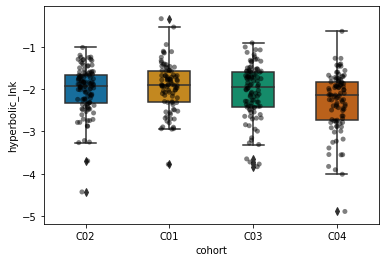

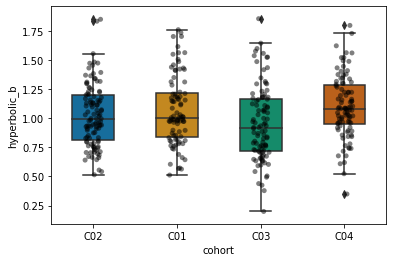

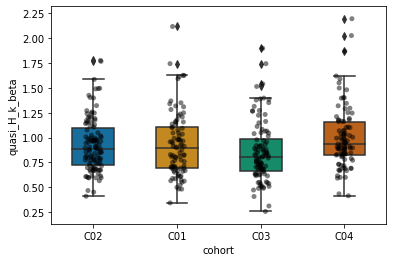

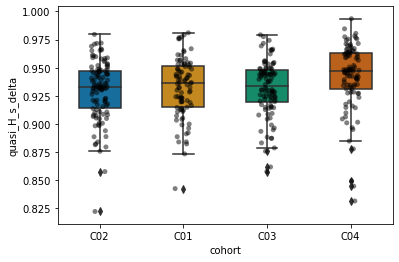

In [64]:
for col in graph_columns:
    df = fits[fits[col].notnull()]
    sns.boxplot(y = col, x ='cohort', 
                     data = df, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='cohort',
                        data=df, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()
#fits.dtypes
#fits.AUC_traditional.unique()

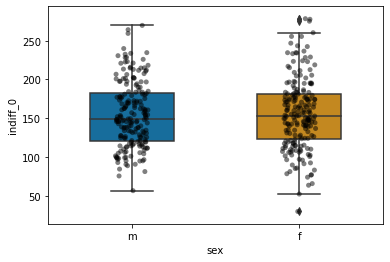

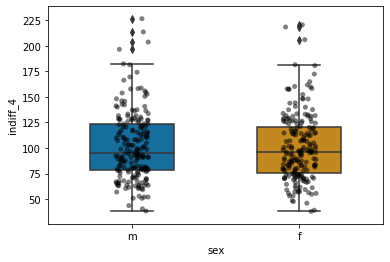

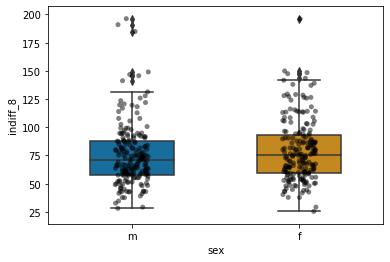

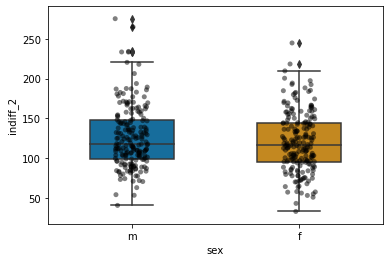

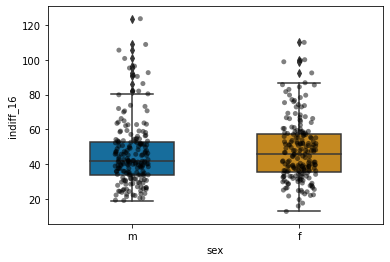

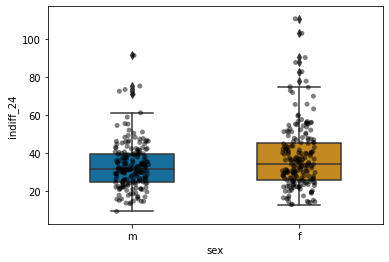

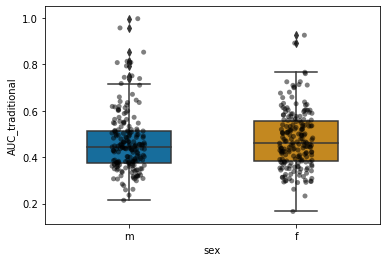

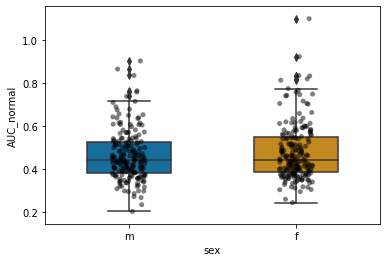

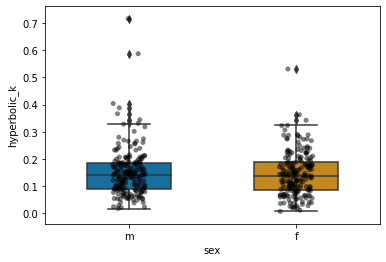

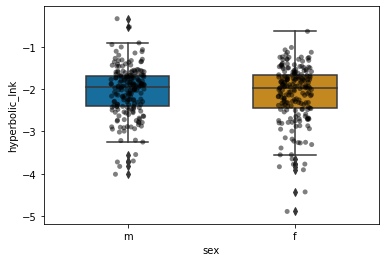

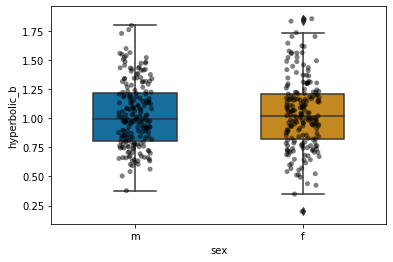

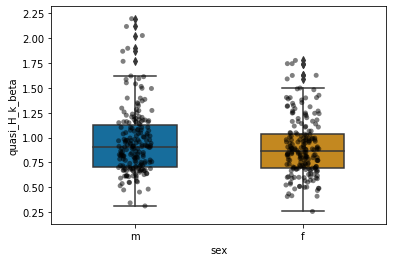

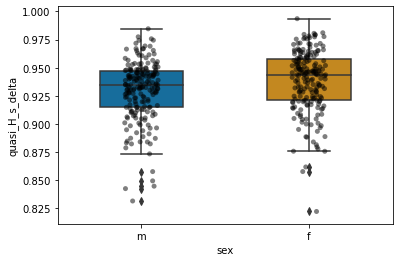

In [63]:
for col in graph_columns:
    df = fits[fits[col].notnull()]
    sns.boxplot(y = col, x ='sex', 
                     data = df, 
                     width = 0.5,
                     palette = "colorblind")

    sns.stripplot(y = col, x ='sex',
                        data=df, 
                        jitter=True, 
                        marker='o', 
                        alpha=0.5,
                        color='black')
    plt.show()

In [31]:
fits_missing = fits[(fits == 'A').any(axis=1)]
fits_missing

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,indiff_8,indiff_16,indiff_24,hyperbolic_k,hyperbolic_lnk,hyperbolic_b,AUC_traditional,AUC_normal,quasi_H_k_beta,quasi_H_s_delta


In [16]:
#fits_missing.to_csv('fits_missing.csv', index=False)

In [37]:
#fits.to_csv(r'C:\Users\cocoy\Dropbox (Palmer Lab)\Palmer Lab\Shae Ziegler\Suzanne_Mitchell_U01\fits.csv', index=False)
fits.to_csv(r'/Users/kendraziegler/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01/fits.csv', index=False)
